# MedMNIST 資料集

## Data

- https://medmnist.com/

- https://github.com/MedMNIST/MedMNIST

- https://pypi.org/project/medmnist/

## Reference

- https://ithelp.ithome.com.tw/articles/10290857

- https://ithelp.ithome.com.tw/articles/10291563

- https://github.com/SraRod/iThome2022/blob/bde205b23fc4d0fb0762fd8fbb7457f84992b4bc/src/make_dataset.py

In [1]:
import medmnist
from medmnist.info import INFO, DEFAULT_ROOT

DATASET = 'chestmnist'
TEMP = '/tmp'
FOLDER = 'data'
POSTFIX = 'png'

def make_dataset() -> None:
    for split in ["train", "val", "test"]:
        print(f"Saving {DATASET} {split}...")
        dataset = getattr(medmnist, INFO[DATASET]['python_class'])(
            split=split, root=TEMP, download=True)
        dataset.save(FOLDER, POSTFIX)  

In [2]:
INFO['chestmnist']

{'python_class': 'ChestMNIST',
 'description': 'The ChestMNIST is based on the NIH-ChestXray14 dataset, a dataset comprising 112,120 frontal-view X-Ray images of 30,805 unique patients with the text-mined 14 disease labels, which could be formulized as a multi-label binary-class classification task. We use the official data split, and resize the source images of 1×1024×1024 into 1×28×28.',
 'url': 'https://zenodo.org/record/6496656/files/chestmnist.npz?download=1',
 'MD5': '02c8a6516a18b556561a56cbdd36c4a8',
 'task': 'multi-label, binary-class',
 'label': {'0': 'atelectasis',
  '1': 'cardiomegaly',
  '2': 'effusion',
  '3': 'infiltration',
  '4': 'mass',
  '5': 'nodule',
  '6': 'pneumonia',
  '7': 'pneumothorax',
  '8': 'consolidation',
  '9': 'edema',
  '10': 'emphysema',
  '11': 'fibrosis',
  '12': 'pleural',
  '13': 'hernia'},
 'n_channels': 1,
 'n_samples': {'train': 78468, 'val': 11219, 'test': 22433},
 'license': 'CC BY 4.0'}

## Note

這主要是一個總共 112,120 個樣本的資料集，且具有下列性質的任務：

- Multi-Label：一個樣本可能同時存在多個不同的 Label
- Binary Class：每一種 Label 是二元分類

這些類別則分別是：

- atelectasis：肺膨脹不全
- cardiomegaly：心臟肥大
- effusion：滲出液
- infiltration：浸潤
- mass：腫塊
- nodule：結節
- pneumonia：肺炎
- pneumothorax：氣胸
- consolidation：（肺）實變化
- edema：肺水腫
- emphysema：氣腫
- fibrosis：纖維化
- pleural thickening：胸膜增厚 （NIH Chest X-rays）
- hernia：疝氣

# 輸出 csv

In [3]:
import pandas as pd
import os
df = pd.read_csv('data/chestmnist.csv', header = None)
cols = ['split', 'img'] + list(INFO['chestmnist']['label'].values())
df = df.rename(columns={ i: col for i, col in enumerate(cols)})
df['img'] = df['img'].apply(lambda x: os.path.join('data/chestmnist/', x))
print(df['img'])

0         data/chestmnist/train0_0_0_0_0_0_0_0_0_0_0_0_0...
1         data/chestmnist/train1_0_0_0_0_0_0_0_0_0_0_0_0...
2         data/chestmnist/train2_0_0_0_0_0_0_0_0_0_0_0_0...
3         data/chestmnist/train3_0_0_0_0_0_0_0_0_0_0_0_0...
4         data/chestmnist/train4_0_0_0_0_0_0_0_0_0_0_0_0...
                                ...                        
112115    data/chestmnist/test22428_0_0_1_0_0_0_0_0_0_0_...
112116    data/chestmnist/test22429_0_0_0_0_0_0_0_0_0_0_...
112117    data/chestmnist/test22430_0_0_1_1_0_0_0_0_0_0_...
112118    data/chestmnist/test22431_0_0_1_0_1_0_0_0_0_0_...
112119    data/chestmnist/test22432_0_0_0_0_0_0_0_1_0_0_...
Name: img, Length: 112120, dtype: object


# Data Exploration

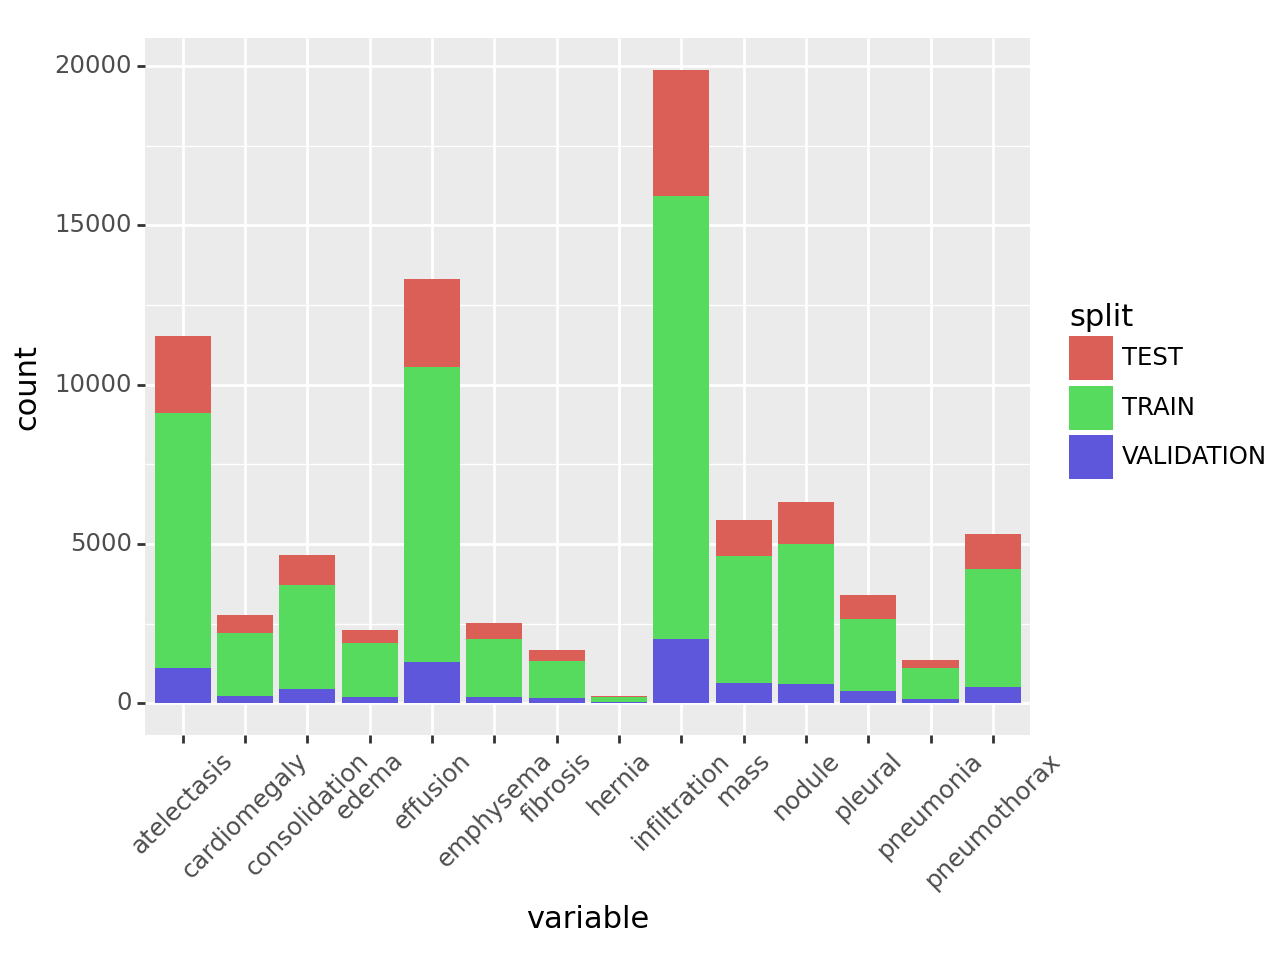

<Figure Size: (640 x 480)>

In [6]:
import pandas as pd
import plotnine as p9

df = pd.read_csv('data/dataset.csv')

# df_long = pd.melt(df, id_vars=['split', 'img'])
ids =['split', 'img']

df_long = pd.melt(df, id_vars=ids)

df_long = df_long[df_long['value'] != 0]
(p9.ggplot(df_long) 
+ p9.geom_bar(p9.aes(x='variable', fill = 'split'))
+ p9.theme(axis_text_x=p9.element_text(angle=45))
)